In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/df_model.csv
/kaggle/input/Train_sample.csv
/kaggle/input/Train_new2.csv


## Fraud detection
Notebook 2

Antonio Montilla

## Downloading libraries

In [2]:
# analisis de datos
import pandas as pd
import numpy as np
import random as rnd
from pandas import read_csv

# visualización
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE

#Principal components & otros
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import (cross_val_score, 
                                     KFold, 
                                     train_test_split)
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


## Importing ddbb

In [3]:
original = '../input/'
url1 = "../input/Train_new2.csv"
url2 = "../input/df_model.csv"

Train_new2 = pd.read_csv(url1)
df_model = read_csv(url2)

In [4]:
#For computational efficiency, a sample of 100,000 observations is extracted for modeling
df_sample = df_model.sample(frac =.305, random_state = 2)
print('El tamaño de la muestra de df_sample es: ', df_sample.shape)

El tamaño de la muestra de df_sample es:  (100100, 14)


## Modelling 1.0

Due to the amount of data and the (binary) distribution of the target variable, I focus on applying classification and clustering models:
* Logistic regression
* Decision tree
* Random forest
* K-nearest neighbors
* Gaussian Naïve Bayes
* Gradient Boosting Classifier
* XGB Classifier model

In [5]:
# Dividing y deleting target variable from X variables
X_train = df_sample.drop(['isFraud'], axis=1)
Y_train = df_sample['isFraud']
# Train and test 80-20 are created with the seed set to 42 for model validation
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((80080, 13), (80080,), (20020, 13), (20020,))

In [6]:
# I create a _performance_auc_ dict for the comparison of the models
performance_auc = {}

### Logistic Regression 1.0

In [7]:
model = LogisticRegression().fit(X_train, Y_train)
predicted_log = model.predict(X_test)
predicted_log

# Confidence score
logreg_score_1 = round(model.score(X_train, Y_train) * 100, 2)

print(logreg_score_1)

print(classification_report(Y_test, predicted_log))

98.03
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19633
           1       0.11      0.01      0.01       387

    accuracy                           0.98     20020
   macro avg       0.55      0.50      0.50     20020
weighted avg       0.96      0.98      0.97     20020



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


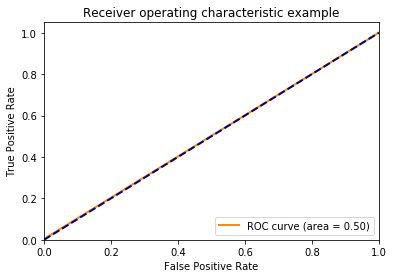

In [8]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(Y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* The logistic regression algorithm does not seem to collect the variability of the data: the result suggests that the model would predict the transactions randomly.
* This could correspond to the inadequacy of this type of algorithm to this type of data or other types of problems more typical of the dataframe used.

### Decision tree 1.0

In [9]:
model = DecisionTreeClassifier().fit(X_train, Y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Confidence score
dectree_score_1 = round(model.score(X_train, Y_train) * 100, 2)
print(dectree_score_1)
print(classification_report(Y_test, predicted_dt))

99.79
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19633
           1       0.23      0.25      0.24       387

    accuracy                           0.97     20020
   macro avg       0.61      0.62      0.61     20020
weighted avg       0.97      0.97      0.97     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

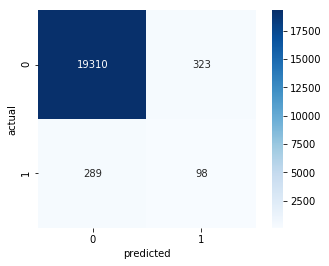

In [12]:
# Create a confusion matrix
matrix = confusion_matrix(Y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

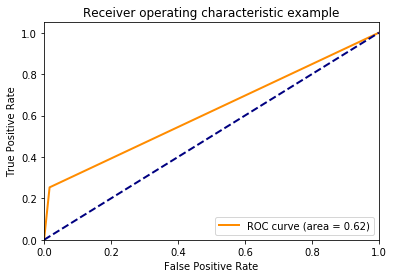

In [13]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(Y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* The result of the decision tree model improves with respect to the logistic regression, with an area in the ROC curve of 62%.
* However, the confusion matrix reveals that the result is mainly due to hits in IsFraud with non-fraudulent transactions (19,312), while hits in transactions with fraud are only 97.

### Random forest 1.0

In [14]:
model = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, Y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# Confidence score
randfor_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(randfor_score_1)
print(classification_report(Y_test, predicted_rf))

99.79
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19633
           1       0.66      0.14      0.23       387

    accuracy                           0.98     20020
   macro avg       0.82      0.57      0.61     20020
weighted avg       0.98      0.98      0.98     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

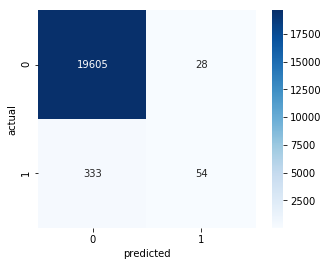

In [17]:
matrix = confusion_matrix(Y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

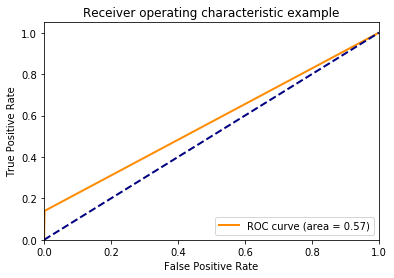

In [18]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* The confusion matrix reveals a similar problem as the decision tree, the result is mainly due to hits in IsFraud with non-fraudulent transactions, while hits in transactions with fraud are only 54.

### k-nearest neighbors 1.0

In [19]:
model = KNeighborsClassifier(3).fit(X_train, Y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
# Confidence score
knn_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(knn_score_1)
print(classification_report(Y_test, predicted_knn))

98.52
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19633
           1       0.42      0.15      0.22       387

    accuracy                           0.98     20020
   macro avg       0.70      0.57      0.60     20020
weighted avg       0.97      0.98      0.97     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

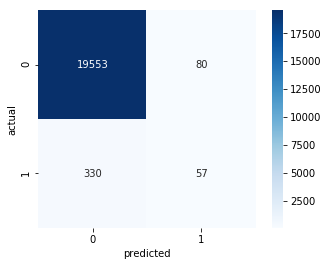

In [22]:
matrix = confusion_matrix(Y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

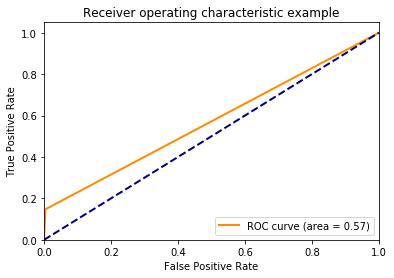

In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* Same pattern as the other models, a bias towards non-fraudulent transactions is identified.

### Gaussian Naive Bayes 1.0

In [24]:
model = GaussianNB().fit(X_train, Y_train)
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
predicted_gau = model.predict(X_test)
predicted_gau

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
# Confidence score
gau_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(gau_score_1)
print(classification_report(Y_test, predicted_gau))

92.82
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     19633
           1       0.10      0.32      0.15       387

    accuracy                           0.93     20020
   macro avg       0.54      0.63      0.55     20020
weighted avg       0.97      0.93      0.95     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

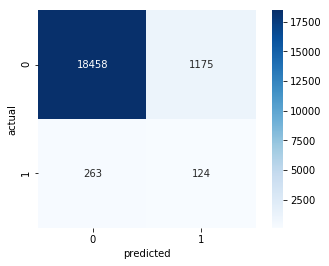

In [27]:
matrix = confusion_matrix(Y_test, predicted_gau)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

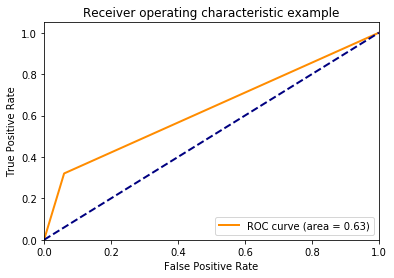

In [28]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_gau)
roc_auc = auc(fpr, tpr)
performance_auc['GaussianNB'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* This model shows the best result so far, however the data still shows some bias towards non-fraudulent transactions

### GradientBoostingClassifier 1.0 

In [29]:
model = GradientBoostingClassifier().fit(X_train, Y_train)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
predicted_gbc = model.predict(X_test)
predicted_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# Confidence score
gbc_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(gbc_score_1)
print(classification_report(Y_test, predicted_gbc))

98.2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19633
           1       0.62      0.04      0.08       387

    accuracy                           0.98     20020
   macro avg       0.80      0.52      0.53     20020
weighted avg       0.97      0.98      0.97     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

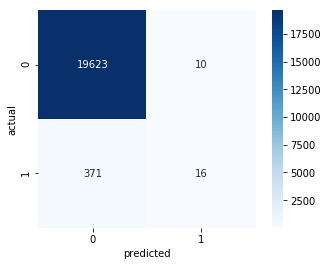

In [32]:
matrix = confusion_matrix(Y_test, predicted_gbc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

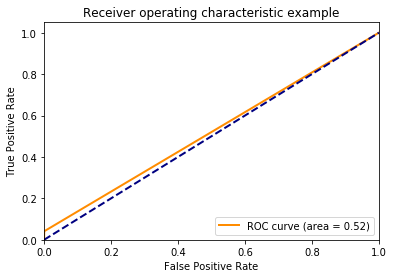

In [33]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_gbc)
roc_auc = auc(fpr, tpr)
performance_auc['GradientBoostingClassifier'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* Model with statistically insignificant estimators.

### XGBClassifier model 1.0

In [34]:
model = XGBClassifier().fit(X_train, Y_train)
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [35]:
predicted_xgb = model.predict(X_test)
predicted_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Confidence score
xgb_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(xgb_score_1)
print(classification_report(Y_test, predicted_xgb))

98.8
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19633
           1       0.73      0.13      0.23       387

    accuracy                           0.98     20020
   macro avg       0.86      0.57      0.61     20020
weighted avg       0.98      0.98      0.98     20020



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

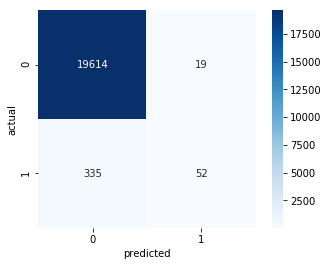

In [37]:
matrix = confusion_matrix(Y_test, predicted_xgb)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

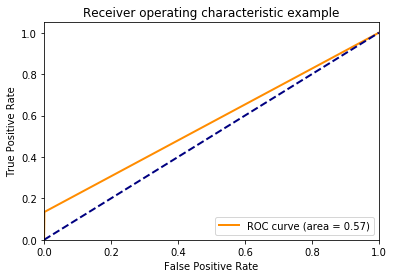

In [38]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_xgb)
roc_auc = auc(fpr, tpr)
performance_auc['XGBClassifier'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* Similar to the other models, the data still shows some bias towards non-fraud transactions.

## Comparative analysis of models 1.0 and evaluation

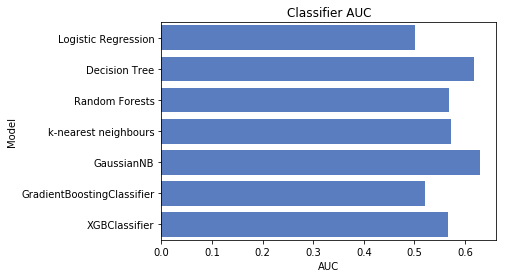

In [39]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

* The Gaussian Naive Bayes classification model is the one that best explains the variability of the data, with an area on the ROC curve of 62%, followed by the decision tree.
* However, as indicated, the results reveal a bias in the estimators towards non-fraudulent transactions, which account for almost all of the successes of the models.
* A possible cause could be the distribution of the target variable in the original dataframe: fraud represents 2% of total transactions.

## Modelling 2.0: Balancing the dataframe
* In this section I proceed to re-estimate the models but this time selecting a 'balanced' sample from the df_model dataframe.
* The main problem with the original database is that the target variable is almost entirely distributed in non-fraudulent observations, which represent 98% of the total data. Because of this, the algorithms used tend to produce estimators with a bias towards non-fraud transactions.
* The _undersampling_ procedure is based on: i) selecting the total number of observations where the target variable is equal to 1, ii) randomly selecting an equal number of observations where the target variable is equal to 0, iii) estimating the models, iv) compare and evaluate.
* A caveat to take into account is the significant loss of data: the sample would be approximately 13,000 observations, which could affect the quality of the estimated models.

In [40]:
#Target variable _isFraud_
print('El tamaño de df_model es: ', df_model.shape)
print("La variable objetivo _Is Fraud_ tiene {0} obervaciones y {1} son valores únicos.".format(df_model['isFraud'].count(),df_model['isFraud'].nunique()))
print(df_model['isFraud'].value_counts())

El tamaño de df_model es:  (328198, 14)
La variable objetivo _Is Fraud_ tiene 328198 obervaciones y 2 son valores únicos.
0    321692
1      6506
Name: isFraud, dtype: int64


In [41]:
#1) Creating new dataframe
#Extracting the sample with values _IsFraud_ = 1
df_model_fraud = df_model.loc[df_model['isFraud'] == 1]
print('El tamaño de df_model_fraud es: ', df_model_fraud.shape)
print(df_model_fraud['isFraud'].value_counts())
#Taking similar number of observations with _isFraud_ = 0
df_model_nofraud = df_model.loc[df_model['isFraud'] == 0]
print('El tamaño de df_model_nofraud es: ', df_model_nofraud.shape)
print(df_model_nofraud['isFraud'].value_counts())
#Sample of _isFraud_ size 6506
df_sample_nofraud = df_model_nofraud.sample(frac =.02022431, random_state = 2)
print('El tamaño de df_sample_nofraud es: ', df_sample_nofraud.shape)
#Merging two samples
df_sample2 = pd.concat([df_model_fraud, df_sample_nofraud])
print('El tamaño de df_sample2 es: ', df_sample2.shape)
print(df_sample2['isFraud'].value_counts())

El tamaño de df_model_fraud es:  (6506, 14)
1    6506
Name: isFraud, dtype: int64
El tamaño de df_model_nofraud es:  (321692, 14)
0    321692
Name: isFraud, dtype: int64
El tamaño de df_sample_nofraud es:  (6506, 14)
El tamaño de df_sample2 es:  (13012, 14)
1    6506
0    6506
Name: isFraud, dtype: int64


In [42]:
#2) Spliting new df in train and test
X_train = df_sample2.drop(['isFraud'], axis=1)
Y_train = df_sample2['isFraud']
# Creating Train and test (80-20) with the seed set to 42 for model validation
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
performance_auc2 = {}

### Logistic Regression 2.0

In [43]:
model = LogisticRegression().fit(X_train, Y_train)
predicted_log = model.predict(X_test)
predicted_log

# Confidence score
logreg_score_1 = round(model.score(X_train, Y_train) * 100, 2)

print(logreg_score_1)

print(classification_report(Y_test, predicted_log))

71.72
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1300
           1       0.76      0.64      0.70      1303

    accuracy                           0.72      2603
   macro avg       0.72      0.72      0.72      2603
weighted avg       0.72      0.72      0.72      2603



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

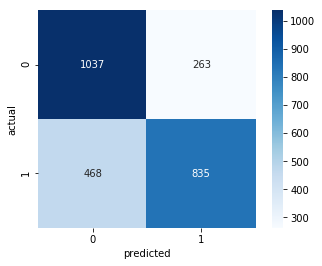

In [44]:
# Create a confusion matrix
matrix = confusion_matrix(Y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

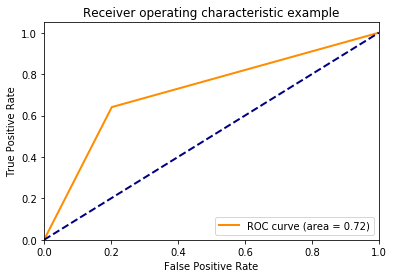

In [45]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(Y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc2['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* The accuracy of the logistic regression algorithm improves substantially to 72%, compared to 50% in the first version of the models.
* Likewise, the dataframe balancing process results in a more equitable distribution of hits in the diffusion matrix in the type of transaction. 

### Decision tree 2.0

In [46]:
model = DecisionTreeClassifier().fit(X_train, Y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
predicted_dt = model.predict(X_test)
predicted_dt

array([1, 1, 0, ..., 1, 1, 0])

In [48]:
# Confidence score
dectree_score_1 = round(model.score(X_train, Y_train) * 100, 2)
print(dectree_score_1)
print(classification_report(Y_test, predicted_dt))

97.1
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1300
           1       0.72      0.68      0.70      1303

    accuracy                           0.71      2603
   macro avg       0.71      0.71      0.71      2603
weighted avg       0.71      0.71      0.71      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

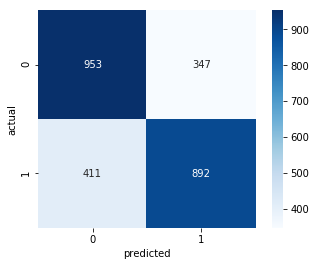

In [49]:
# Create a confusion matrix
matrix = confusion_matrix(Y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

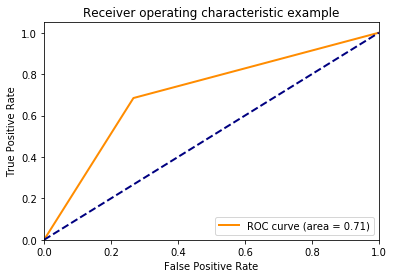

In [50]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(Y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc2['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Random forest 2.0

In [51]:
model = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, Y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
predicted_rf = model.predict(X_test)
predicted_rf

array([1, 1, 0, ..., 1, 0, 0])

In [53]:
# Confidence score
randfor_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(randfor_score_1)
print(classification_report(Y_test, predicted_rf))

97.1
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1300
           1       0.77      0.74      0.76      1303

    accuracy                           0.76      2603
   macro avg       0.76      0.76      0.76      2603
weighted avg       0.76      0.76      0.76      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

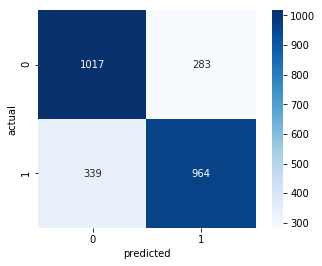

In [54]:
matrix = confusion_matrix(Y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

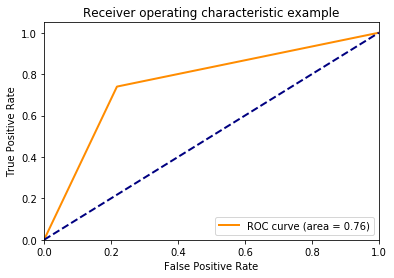

In [55]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc2['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* The random forest model is the one that has best fit the data so far, with 76% accuracy and an equal distribution in the results in terms of transaction type.

### k-nearest neighbors 2.0

In [56]:
model = KNeighborsClassifier(3).fit(X_train, Y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
predicted_knn = model.predict(X_test)
predicted_knn

array([1, 1, 0, ..., 0, 0, 1])

In [58]:
# Confidence score
knn_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(knn_score_1)
print(classification_report(Y_test, predicted_knn))

83.14
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1300
           1       0.69      0.70      0.70      1303

    accuracy                           0.69      2603
   macro avg       0.69      0.69      0.69      2603
weighted avg       0.69      0.69      0.69      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

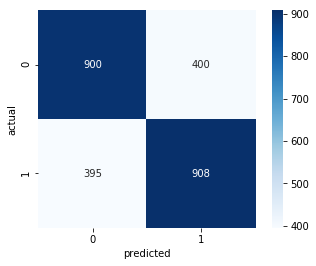

In [59]:
matrix = confusion_matrix(Y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

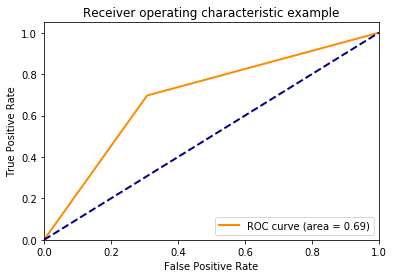

In [60]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc2['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Gaussian Naive Bayes 2.0

In [61]:
model = GaussianNB().fit(X_train, Y_train)
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
predicted_gau = model.predict(X_test)
predicted_gau

array([1, 1, 0, ..., 0, 0, 0])

In [63]:
# Confidence score
gau_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(gau_score_1)
print(classification_report(Y_test, predicted_gau))

67.55
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1300
           1       0.74      0.53      0.61      1303

    accuracy                           0.67      2603
   macro avg       0.68      0.67      0.66      2603
weighted avg       0.68      0.67      0.66      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

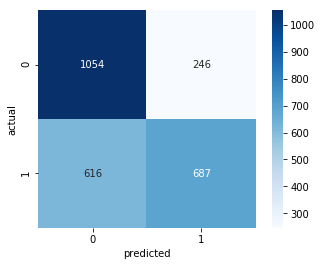

In [64]:
matrix = confusion_matrix(Y_test, predicted_gau)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

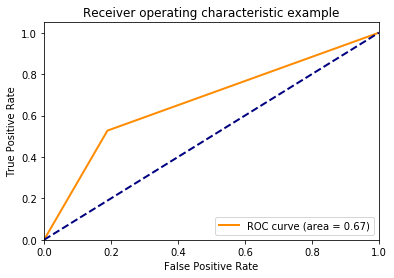

In [65]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_gau)
roc_auc = auc(fpr, tpr)
performance_auc2['GaussianNB'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### GradientBoostingClassifier 2.0

In [66]:
model = GradientBoostingClassifier().fit(X_train, Y_train)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
predicted_gbc = model.predict(X_test)
predicted_gbc

array([1, 1, 0, ..., 1, 0, 0])

In [68]:
# Confidence score
gbc_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(gbc_score_1)
print(classification_report(Y_test, predicted_gbc))

76.44
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1300
           1       0.77      0.70      0.73      1303

    accuracy                           0.74      2603
   macro avg       0.75      0.74      0.74      2603
weighted avg       0.75      0.74      0.74      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

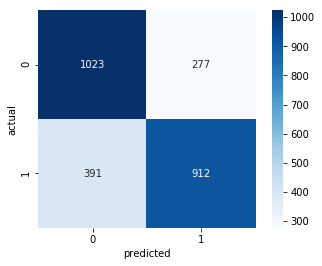

In [69]:
matrix = confusion_matrix(Y_test, predicted_gbc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

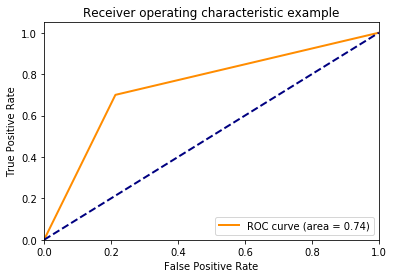

In [70]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_gbc)
roc_auc = auc(fpr, tpr)
performance_auc2['GradientBoostingClassifier'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### XGBClassifier model 2.0

In [71]:
model = XGBClassifier().fit(X_train, Y_train)
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [72]:
predicted_xgb = model.predict(X_test)
predicted_xgb

array([1, 1, 0, ..., 1, 0, 0])

In [73]:
# Confidence score
xgb_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(xgb_score_1)
print(classification_report(Y_test, predicted_xgb))

90.98
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1300
           1       0.80      0.74      0.77      1303

    accuracy                           0.77      2603
   macro avg       0.78      0.77      0.77      2603
weighted avg       0.78      0.77      0.77      2603



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

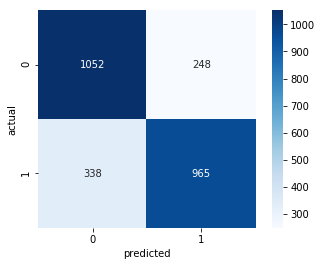

In [74]:
matrix = confusion_matrix(Y_test, predicted_xgb)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

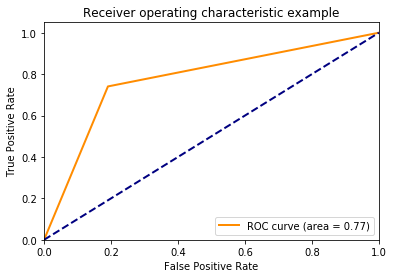

In [75]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_xgb)
roc_auc = auc(fpr, tpr)
performance_auc2['XGBClassifier'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Comparative analysis of models 2.0 and evaluation

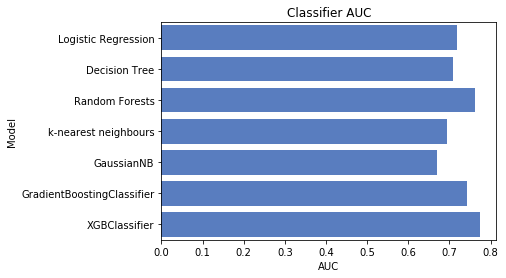

In [76]:
perf = pd.DataFrame.from_dict(performance_auc2, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

* In general, a significant improvement is observed in the predictive capacity of the selected algorithms in explaining the target variable.
* Likewise, the study of the confusion matrix reveals an almost equal distribution in the correct answers of the model with respect to the objective variable: the correct answers (1,1) are generally almost equal to the correct answers (0,0).
* The results confirm the relevance of applying dataframe balancing methods.
* With 74% area in the ROC curve, the XGBClassifier model estimator has been the one that best fits the data, with a balanced distribution in terms of transaction type.

## Modelling 3.0: Excluding biases in balancing the dataframe
* In this section the same procedure as above is repeated, but changing the proportion from 1-0 in the extraction of the sample in the balancing of the dataframe from 50-50 to 30-70.
* This is because this ratio is more realistic or representative of what fraud might represent in a typical transaction.
* It will be applied only for Logistic Regression, Random Forest and XGBClassifier models in contrast to the previous version.

In [77]:
#1) Creando la nueva dataframe
#Extrayendo la nueva muestra con valores _IsFraud_ = 1
df_model_fraud = df_model.loc[df_model['isFraud'] == 1]
print('El tamaño de df_model_fraud es: ', df_model_fraud.shape)
print(df_model_fraud['isFraud'].value_counts())
#Ahora lo equivalente con valores _isFraud_ = 0
df_model_nofraud = df_model.loc[df_model['isFraud'] == 0]
print('El tamaño de df_model_nofraud es: ', df_model_nofraud.shape)
print(df_model_nofraud['isFraud'].value_counts())
#Muestra de _isFraud_ de tamaño 6506
df_sample_nofraud = df_model_nofraud.sample(frac =.04718799, random_state = 2)
print('El tamaño de df_sample_nofraud es: ', df_sample_nofraud.shape)
#Concatenando las dos samples
df_sample2 = pd.concat([df_model_fraud, df_sample_nofraud])
print('El tamaño de df_sample2 es: ', df_sample2.shape)
print(df_sample2['isFraud'].value_counts())

El tamaño de df_model_fraud es:  (6506, 14)
1    6506
Name: isFraud, dtype: int64
El tamaño de df_model_nofraud es:  (321692, 14)
0    321692
Name: isFraud, dtype: int64
El tamaño de df_sample_nofraud es:  (15180, 14)
El tamaño de df_sample2 es:  (21686, 14)
0    15180
1     6506
Name: isFraud, dtype: int64


In [78]:
#2) Separando la nueva df en train y test
# Dividir y eliminar variable objetivo de explicativas
X_train = df_sample2.drop(['isFraud'], axis=1)
Y_train = df_sample2['isFraud']
# Se crea train ay test 80-20 con la semilla fijada en 42 para la validación de los modelos
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
performance_auc3 = {}

### Regresión Logística 3.0

In [79]:
model = LogisticRegression().fit(X_train, Y_train)
predicted_log = model.predict(X_test)
predicted_log

# Confidence score
logreg_score_1 = round(model.score(X_train, Y_train) * 100, 2)

print(logreg_score_1)

print(classification_report(Y_test, predicted_log))

77.18
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      3040
           1       0.70      0.37      0.49      1298

    accuracy                           0.76      4338
   macro avg       0.74      0.65      0.67      4338
weighted avg       0.75      0.76      0.74      4338



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

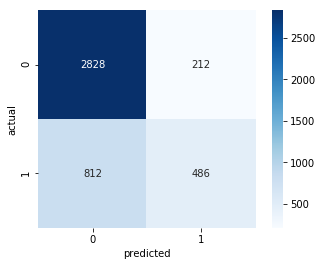

In [80]:
# Create a confusion matrix
matrix = confusion_matrix(Y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

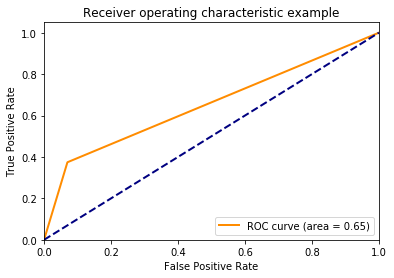

In [81]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(Y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc3['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Random forest 3.0

In [82]:
model = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, Y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
# Confidence score
randfor_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(randfor_score_1)
print(classification_report(Y_test, predicted_rf))

97.72
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3040
           1       0.76      0.57      0.65      1298

    accuracy                           0.82      4338
   macro avg       0.80      0.75      0.76      4338
weighted avg       0.81      0.82      0.81      4338



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

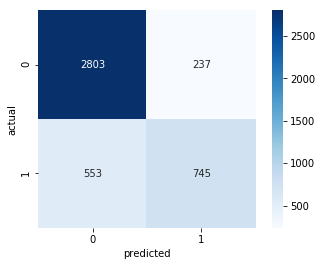

In [85]:
matrix = confusion_matrix(Y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

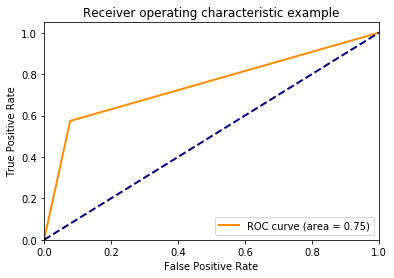

In [86]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc3['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### XGBClassifier model 3.0

In [87]:
model = XGBClassifier().fit(X_train, Y_train)
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [88]:
predicted_xgb = model.predict(X_test)
predicted_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
# Confidence score
xgb_score_1 = round(model.score(X_train,Y_train) * 100, 2)
print(xgb_score_1)
print(classification_report(Y_test, predicted_xgb))

90.61
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3040
           1       0.75      0.57      0.65      1298

    accuracy                           0.82      4338
   macro avg       0.79      0.74      0.76      4338
weighted avg       0.81      0.82      0.81      4338



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

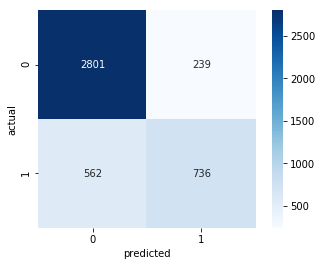

In [90]:
matrix = confusion_matrix(Y_test, predicted_xgb)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

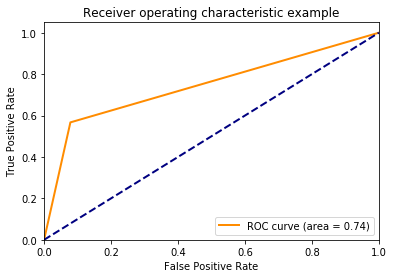

In [91]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_xgb)
roc_auc = auc(fpr, tpr)
performance_auc3['XGBClassifier'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

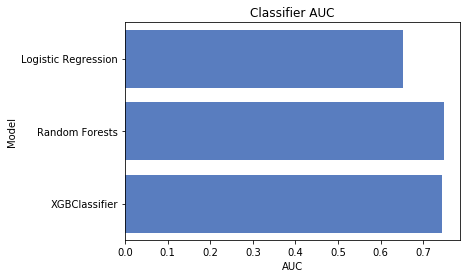

In [92]:
#Comparativa 
perf = pd.DataFrame.from_dict(performance_auc3, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

* Changing the ratio from 50-50 to 30-70 in the _IsFraud_ sample extraction process in dataframe balancing does not significantly alter the results of the models.
* At the margin, the models reduce their predictive power of the data.

## Final observations and conclusions

* Being able to predict the veracity of a transaction made through a non-traditional method of payment is a fundamental objective to consolidate the advancement of technology in 21st century consumption.
* The information provided and stored by users, although abundant, complex and sensitive, is the elementary input to guarantee the proper functioning of fraud prediction models. Understanding, first, and treating, second, this information is the determining factor in the implementation of the machine learning/big data methodology in the prevention of bank fraud.
* In this project, it was identified that the classification algorithms of XGBClassifier, GradientBoostingClassifier and Random Forest are the ones that best fit the data, giving rise to a deeper development of this type of models in future works. For its further application, the distribution of the target variable must be taken into account, and ensure that the dataframe to be used in the modelling is balanced.
* An important deficit in this project has been the lack of knowledge of a large part of the variables with transaction information, in particular those referring to the identity and purchase/sale patterns of the buyer/seller, mainly due to regulatory restrictions.
* A next step, probably directly at the financial intermediaries, would be the appropriate exploitation of consumer information. Its extensive application in the real world would represent significant savings in the industry, both for the buyer and for the intermediary and the platform providers for the exchange of purchase/sale.
* Finally, once the modelling process has been improved, the next task would be the development of algorithms that, based on the prediction of the veracity of a transaction, instruct mechanical tasks for its validation by the user. An example would be developing an application that automatically checks with the user if they are carrying out the transaction in question.
